In [1]:
import problems
from experiments import *

problem = problems.random_sparse_factor_problem(100)
x, y = problem.rvs(500)
x.sum(axis=0), x.shape

(array([ 5.,  6., 10.,  3.,  3.,  5.,  6.,  8.,  3.,  3.,  3.,  4.,  5.,
         5.,  8.,  4.,  9.,  4.,  4.,  5.,  4.,  9.,  9.,  4.,  6.,  4.,
         5.,  8.,  3.,  5.,  4.,  4.,  9.,  4.,  1.,  6.,  2.,  5.,  6.,
         4.,  5.,  4.,  3.,  8.,  6.,  4.,  4.,  8.,  6.,  8.,  5.,  3.,
         6.,  5., 10.,  5.,  8.,  9.,  5.,  4.,  5.,  6.,  8.,  5.,  3.,
         5.,  7.,  8.,  8.,  7.,  4.,  4.,  4.,  5.,  4.,  5.,  5.,  2.,
         8.,  1., 10.,  5.,  3.,  2.,  4.,  3.,  5.,  6.,  4., 10.,  5.,
         5.,  3.,  4.,  4.,  3.,  3.,  8.,  6.,  8.]),
 (500, 100))

In [15]:
from fastridge import RidgeEM, RidgeLOOCV

ridgeEM = RidgeEM(fit_intercept=False, normalize=False)
ridgeCV_GLM = RidgeLOOCV(alphas=100, fit_intercept=False, normalize=False)
ridgeCV_fixed = RidgeLOOCV(alphas=np.logspace(-10, 10, 100, endpoint=True, base=10), fit_intercept=False, normalize=False)

estimators = [ridgeEM, ridgeCV_fixed]
est_names = ['EM', 'CV_fix']
# ns = [100, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000]
ns = [100, 150, 200, 300, 400, 600, 800, 1200, 1600, 2400, 3200, 4800, 6400, 9600, 12800]
sigmas = [1.0, 2.0, 3.0, 4.0, 5.0, 6.0]
probs = [problems.random_sparse_factor_problem(100, sigma_eps=sig) for sig in sigmas]
r = 100

exp = Experiment(probs, estimators, ns, r, est_names)
exp.run()

In [33]:
exp.est_names[1]='LOOCV'

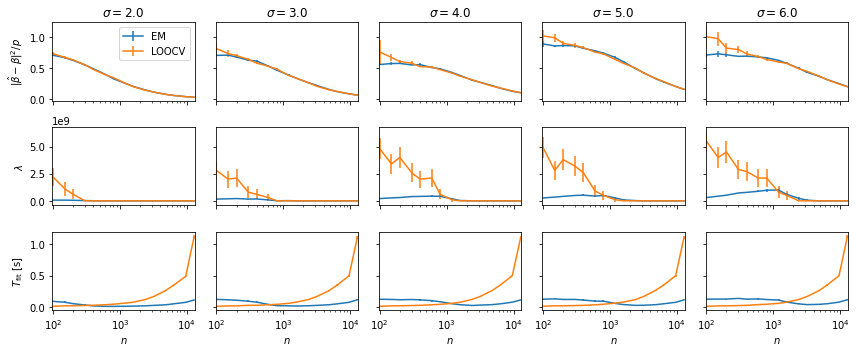

In [42]:
from importlib import reload
import plotting
reload(plotting)
from plotting import plot_metrics

sigmas_idx_plot = [1, 2, 3, 4, 5]
fig, axs = plot_metrics(exp, [parameter_mean_squared_error, regularization_parameter, fitting_time], sigmas_idx_plot, figsize=(12, 5))
axs[0, 0].set_xscale('log')
for j in range(5):
    axs[0, j].set_title(f'$\sigma = {sigmas[sigmas_idx_plot[j]]}$')
# axs[1, 0].set_yscale('log')
axs[0, 0].legend()
plt.subplots_adjust(wspace=0, hspace=0)
plt.savefig('sparse_setting.pdf', dpi=600, bbox_inches="tight")
plt.show()

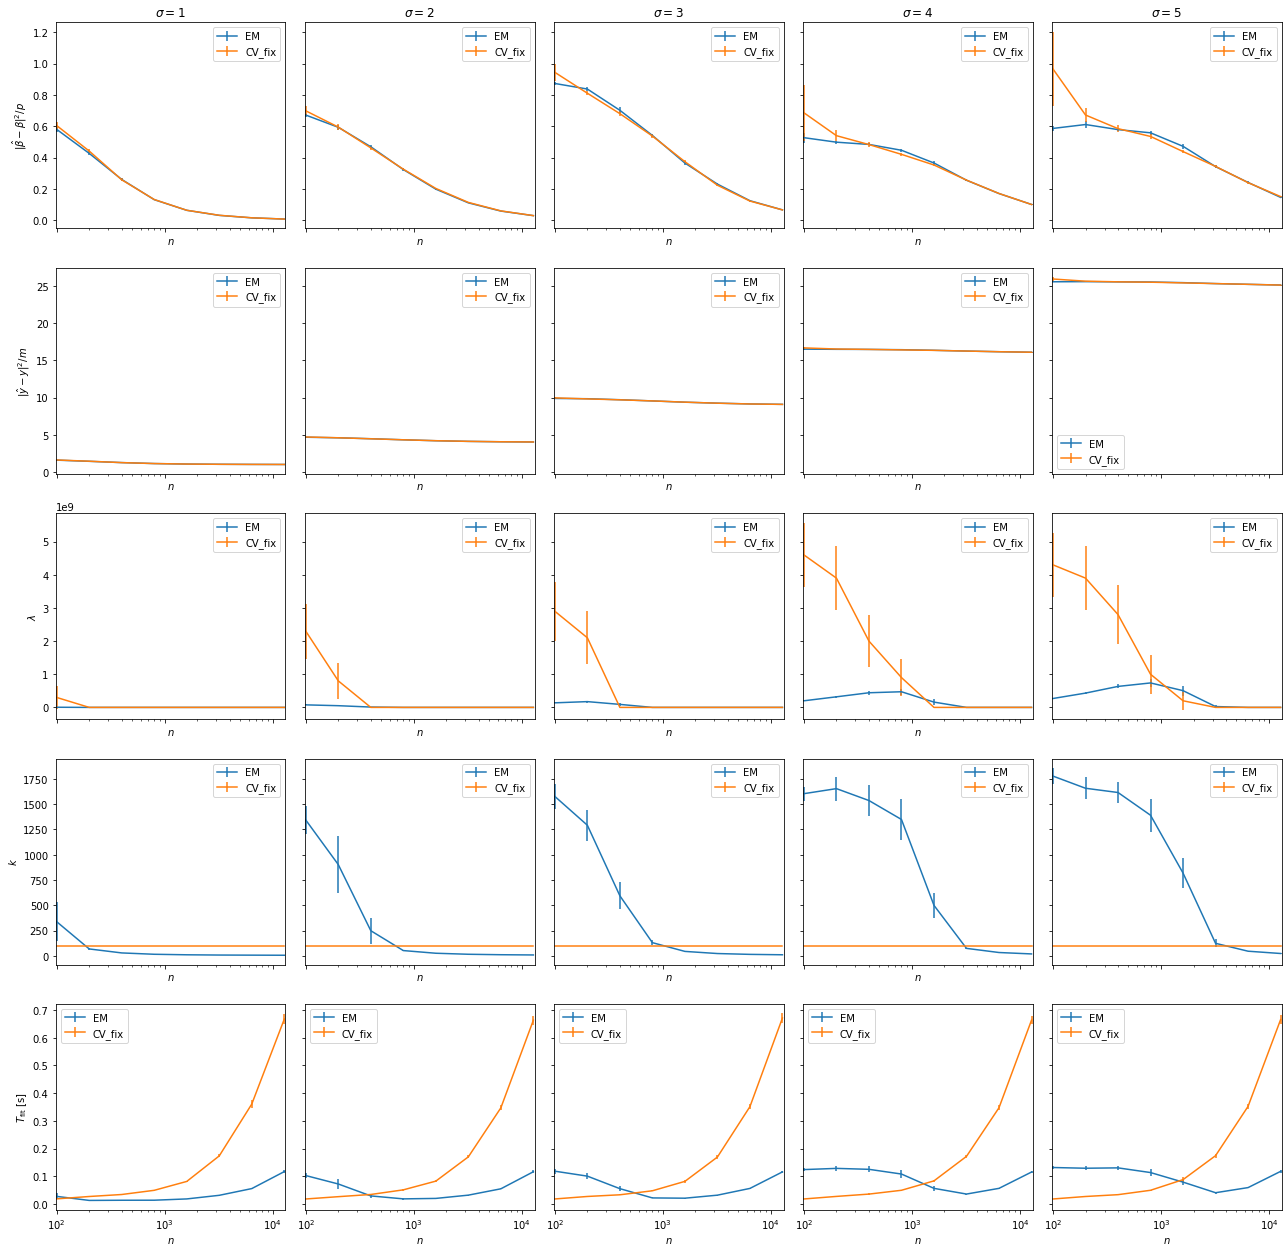

In [14]:
fig, axs = plot_metrics(default_stats, exp)
axs[0, 0].set_xscale('log')
for j in range(5):
    axs[0, j].set_title(f'$\sigma = {j+1}$')
plt.show()

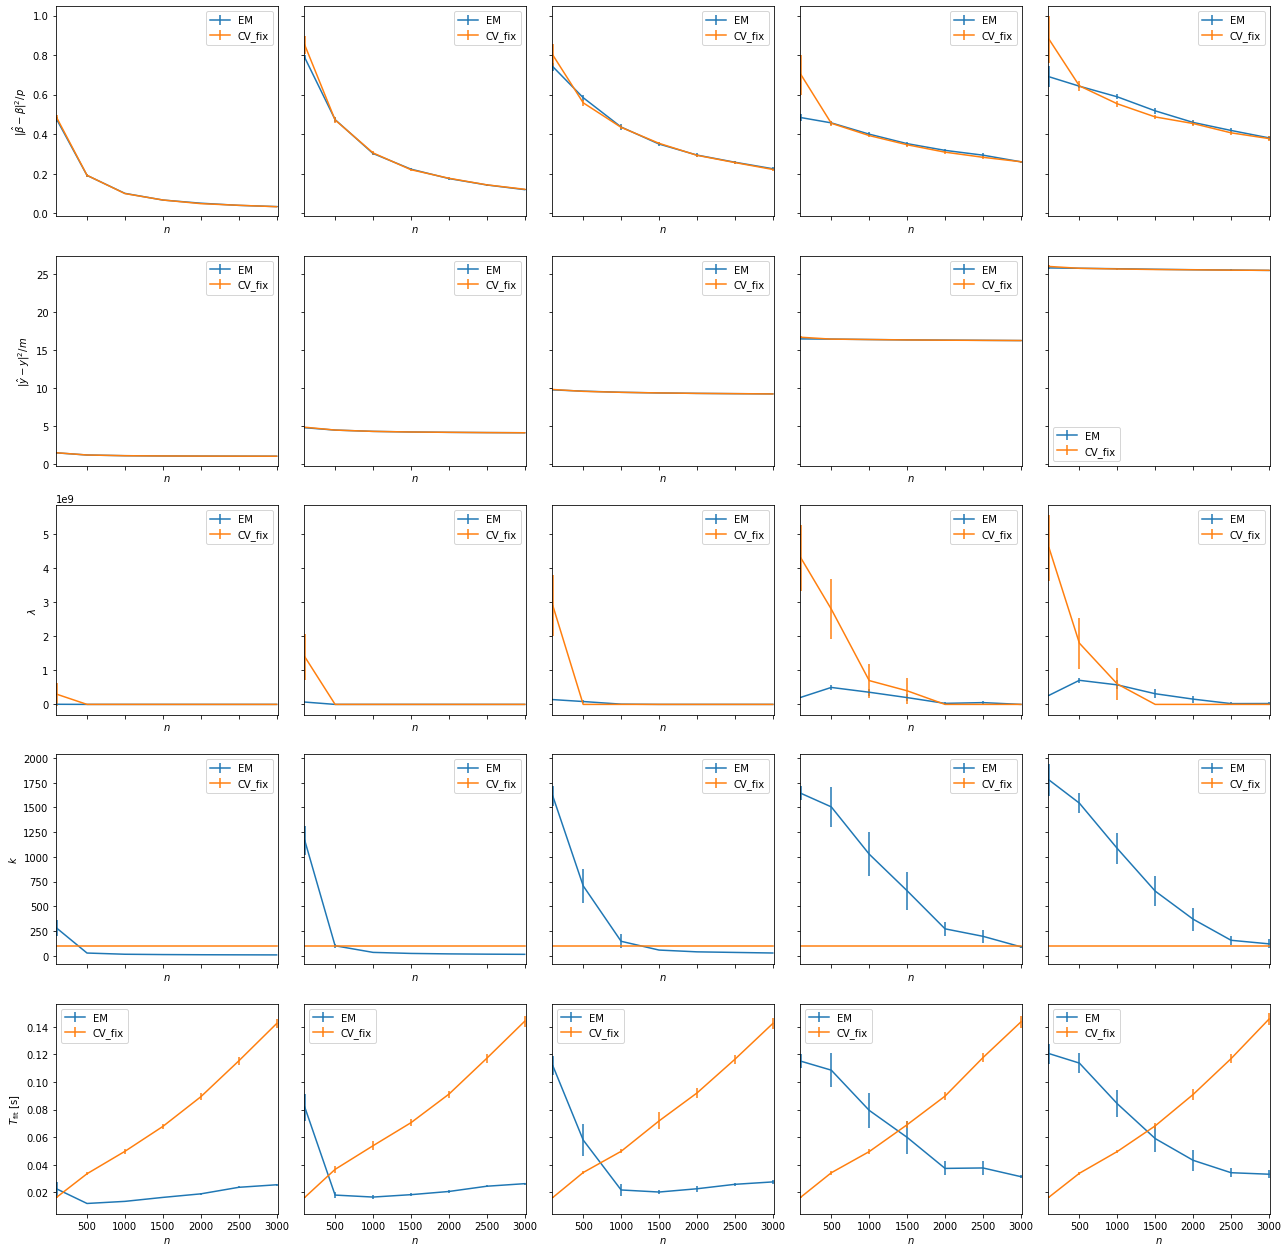

In [7]:
from plotting import plot_metrics
from matplotlib import pyplot as plt

plot_metrics(default_stats, exp)
plt.show()

In [13]:
ps = np.array([100, 200, 300, 400, 500])
probs = [problems.random_sparse_factor_problem(p) for p in ps]
ns = np.column_stack([i*ps for i in [1, 2, 4, 8, 16]])
r = 10
estimators = [ridgeEM, ridgeCV_fixed]
est_names = ['EM', 'CV_fix']

exp = Experiment(probs, estimators, ns, r, est_names)
exp.run()

(<Figure size 1296x1260 with 25 Axes>,
 array([[<AxesSubplot:xlabel='$n$', ylabel='$\\|\\hat{\\beta}-\\beta\\|^2/p$'>,
         <AxesSubplot:xlabel='$n$'>, <AxesSubplot:xlabel='$n$'>,
         <AxesSubplot:xlabel='$n$'>, <AxesSubplot:>],
        [<AxesSubplot:xlabel='$n$', ylabel='$\\|\\hat{y}-y\\|^2/m$'>,
         <AxesSubplot:xlabel='$n$'>, <AxesSubplot:xlabel='$n$'>,
         <AxesSubplot:xlabel='$n$'>, <AxesSubplot:>],
        [<AxesSubplot:xlabel='$n$', ylabel='$\\lambda$'>,
         <AxesSubplot:xlabel='$n$'>, <AxesSubplot:xlabel='$n$'>,
         <AxesSubplot:xlabel='$n$'>, <AxesSubplot:>],
        [<AxesSubplot:xlabel='$n$', ylabel='$k$'>,
         <AxesSubplot:xlabel='$n$'>, <AxesSubplot:xlabel='$n$'>,
         <AxesSubplot:xlabel='$n$'>, <AxesSubplot:>],
        [<AxesSubplot:xlabel='$n$', ylabel='$T_\\mathrm{fit}$ [s]'>,
         <AxesSubplot:xlabel='$n$'>, <AxesSubplot:xlabel='$n$'>,
         <AxesSubplot:xlabel='$n$'>, <AxesSubplot:xlabel='$n$'>]],
       dtype=object))

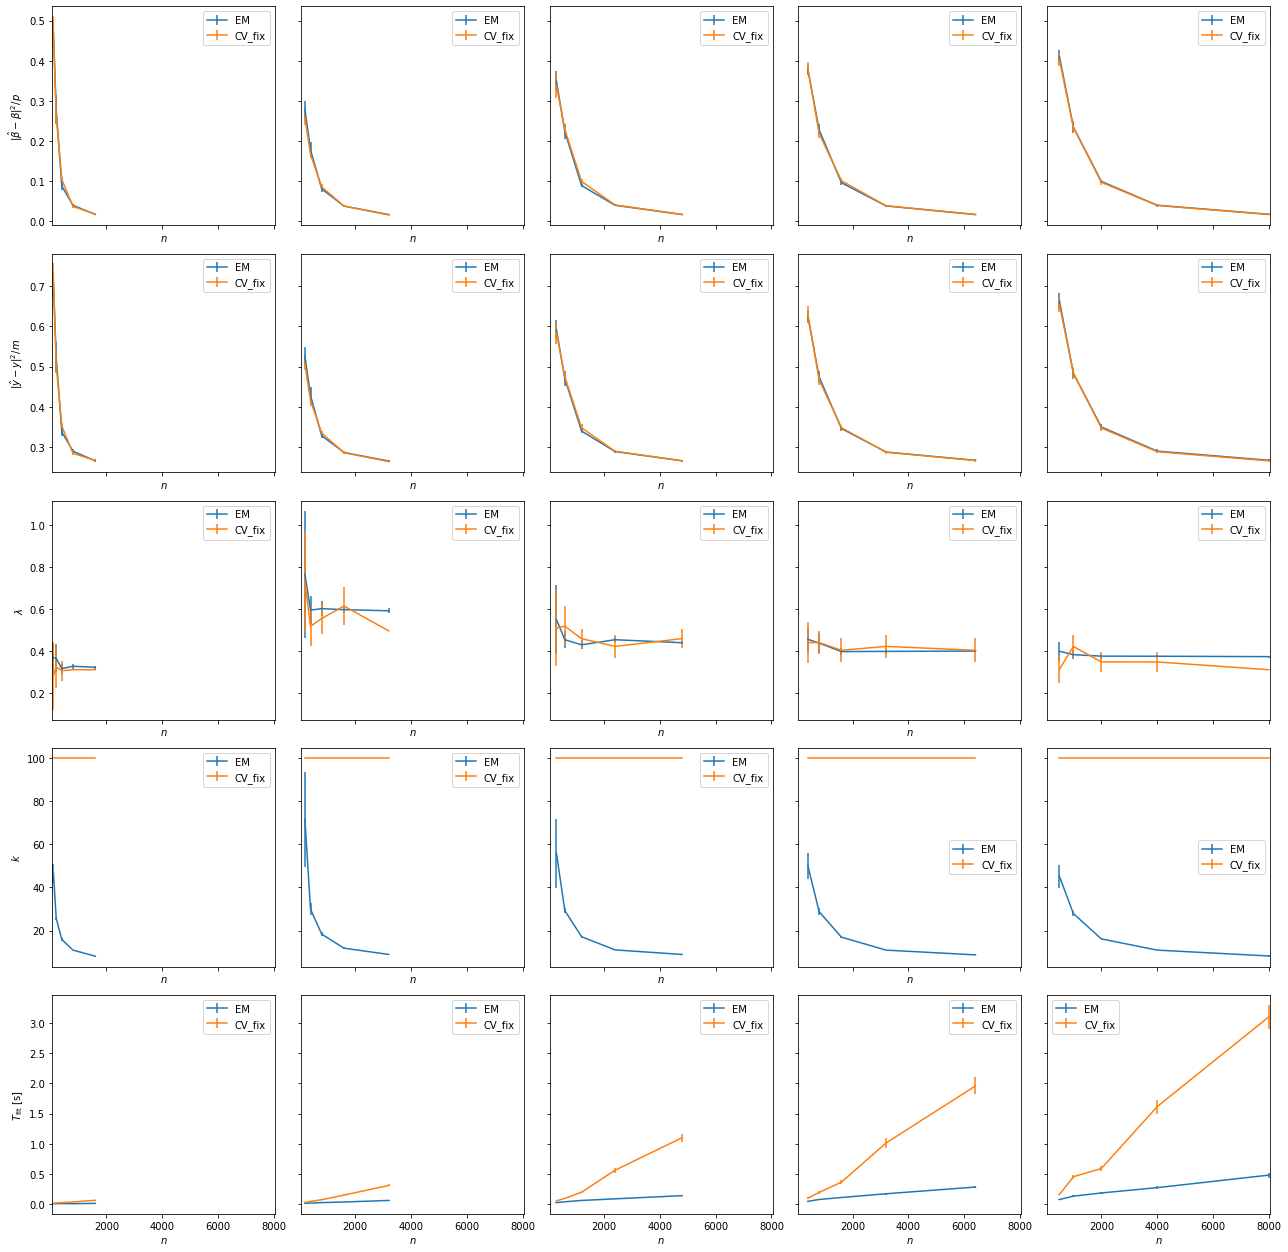

In [14]:
plot_metrics(default_stats, exp)
